In [1]:
import sys 
sys.path.append("..")

In [2]:
import os
from data.info import InfoData
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
env = "superpc"
# env = "nitlab"

# Patients Table

In [4]:
data = InfoData(env=env)
patients_csv_path = os.path.join(data.mimiciv_directory_path, "hosp", "patients.csv")
# print(patient_csv_path)
df_patients = pd.read_csv(patients_csv_path)
display(df_patients)

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000058,F,33,2168,2020 - 2022,NaN
3,10000068,F,19,2160,2008 - 2010,NaN
4,10000084,M,72,2160,2017 - 2019,2161-02-13
...,...,...,...,...,...,...
364622,19999828,F,46,2147,2017 - 2019,NaN
364623,19999829,F,28,2186,2008 - 2010,NaN
364624,19999840,M,58,2164,2008 - 2010,2164-09-17
364625,19999914,F,49,2158,2017 - 2019,NaN


In [5]:
df_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364627 entries, 0 to 364626
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   subject_id         364627 non-null  int64 
 1   gender             364627 non-null  object
 2   anchor_age         364627 non-null  int64 
 3   anchor_year        364627 non-null  int64 
 4   anchor_year_group  364627 non-null  object
 5   dod                38301 non-null   object
dtypes: int64(3), object(3)
memory usage: 16.7+ MB


In [6]:
patients_gender = df_patients["gender"].value_counts()

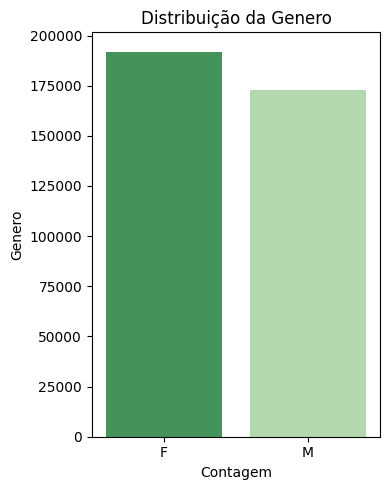

In [7]:
plt.figure(figsize=(4,5))
sns.barplot(x=patients_gender.index, y=patients_gender.values, hue=patients_gender.index, palette='Greens_r', dodge=False, legend=False)
plt.title('Distribuição da Genero')
plt.xlabel('Contagem')
plt.ylabel('Genero')
plt.tight_layout()
plt.show()

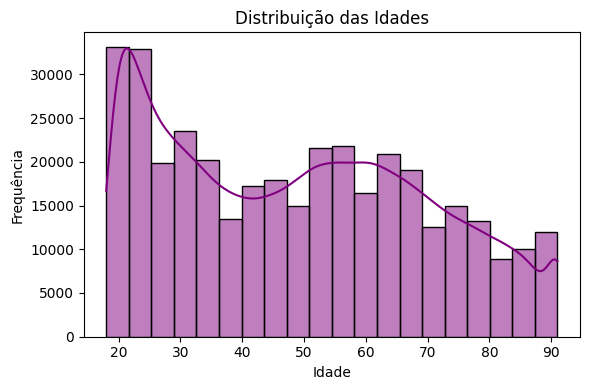

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df_patients['anchor_age'].dropna(), bins=20, kde=True, color='purple')
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

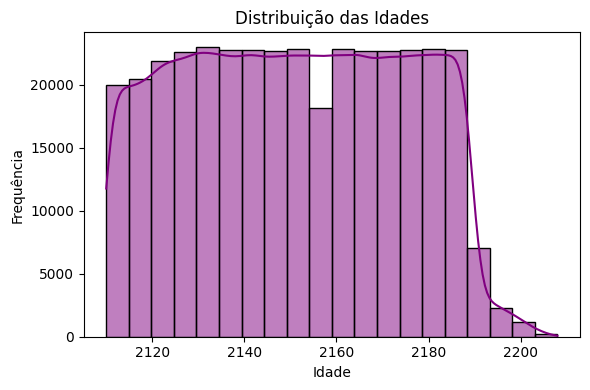

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df_patients['anchor_year'].dropna(), bins=20, kde=True, color='purple')
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

In [10]:
"como calcular o tempo decorrido entre o ano de admissão e o dia da morte"

'como calcular o tempo decorrido entre o ano de admissão e o dia da morte'

# Diagnoses Table (d_icd_diagnoses)

In [11]:
data = InfoData(env=env)
d_diagnoses_csv_path = os.path.join(data.mimiciv_directory_path, "hosp", "d_icd_diagnoses.csv")
diagnoses_csv_path = os.path.join(data.mimiciv_directory_path, "hosp", "diagnoses_icd.csv")
# print(patient_csv_path)
df_d_diagnoses = pd.read_csv(d_diagnoses_csv_path)
df_diagnoses = pd.read_csv(diagnoses_csv_path)


In [12]:
display(df_d_diagnoses)

,icd_code,icd_version,long_title
0,0010,9,Cholera due to vibrio cholerae
1,0011,9,Cholera due to vibrio cholerae el tor
2,0019,9,"Cholera, unspecified"
3,0020,9,Typhoid fever
4,0021,9,Paratyphoid fever A
...,...,...,...
112102,Z992,10,Dependence on renal dialysis
112103,Z993,10,Dependence on wheelchair
112104,Z998,10,Dependence on other enabling machines and devices
112105,Z9981,10,Dependence on supplemental oxygen


In [13]:
df_d_diagnoses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112107 entries, 0 to 112106
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   icd_code     112107 non-null  object
 1   icd_version  112107 non-null  int64 
 2   long_title   112107 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


In [14]:
display(df_diagnoses)

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10000032,22595853,1,5723,9
1,10000032,22595853,2,78959,9
2,10000032,22595853,3,5715,9
3,10000032,22595853,4,07070,9
4,10000032,22595853,5,496,9
...,...,...,...,...,...
6364515,19999987,23865745,7,41401,9
6364516,19999987,23865745,8,78039,9
6364517,19999987,23865745,9,0413,9
6364518,19999987,23865745,10,36846,9


In [15]:
df_diagnoses_v9 = df_diagnoses[df_diagnoses["icd_version"] == 9]
df_diagnoses_v10 = df_diagnoses[df_diagnoses["icd_version"] == 10]

In [16]:
display(df_diagnoses_v10)

,subject_id,hadm_id,seq_num,icd_code,icd_version
40,10000084,23052089,1,G3183,10
41,10000084,23052089,2,F0280,10
42,10000084,23052089,3,R441,10
43,10000084,23052089,4,R296,10
44,10000084,23052089,5,E785,10
...,...,...,...,...,...
6364485,19999828,29734428,18,Z9049,10
6364486,19999828,29734428,19,Z87891,10
6364487,19999828,29734428,20,B9620,10
6364488,19999828,29734428,21,Z1611,10


In [17]:
df_diagnoses_v9_count = df_diagnoses_v9["icd_code"].value_counts()
df_diagnoses_v9_count.index = [df_d_diagnoses.loc[df_d_diagnoses["icd_code"] == index]["long_title"].values[0] for index in df_diagnoses_v9_count.index]
print(len(df_diagnoses_v9_count.index))

9143


In [18]:
display(df_diagnoses_v9_count)

Unspecified essential hypertension                                                                            102368
Other and unspecified hyperlipidemia                                                                           67293
Esophageal reflux                                                                                              48628
Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled     43077
Atrial fibrillation                                                                                            37070
                                                                                                               ...  
Polyarticular juvenile rheumatoid arthritis, acute                                                                 1
Activity involving exercise machines primarily for muscle strengthening                                            1
Syphilitic optic atrophy                                        

In [19]:
df_diagnoses_v10_count = df_diagnoses_v10["icd_code"].value_counts()
df_diagnoses_v10_count.index = [df_d_diagnoses.loc[df_d_diagnoses["icd_code"] == index]["long_title"].values[0] for index in df_diagnoses_v10_count.index]
print(len(df_diagnoses_v10_count.index))

19440


In [20]:
display(df_diagnoses_v10_count)

Hyperlipidemia, unspecified                                                         84571
Essential (primary) hypertension                                                    83776
Personal history of nicotine dependence                                             62806
Gastro-esophageal reflux disease without esophagitis                                56159
Major depressive disorder, single episode, unspecified                              41876
                                                                                    ...  
Spontaneous rupture of flexor tendons, left forearm                                     1
Laceration with foreign body of oral cavity, initial encounter                          1
Other infective spondylopathies, thoracolumbar region                                   1
Poisoning by vitamins, accidental (unintentional), initial encounter                    1
Maternal care for (suspected) fetal abnormality and damage, unspecified, fetus 2        1
Name: coun

In [26]:
interest_list = ["F" + str(n) for n in range(20, 49)]
interest_list

['F20',
 'F21',
 'F22',
 'F23',
 'F24',
 'F25',
 'F26',
 'F27',
 'F28',
 'F29',
 'F30',
 'F31',
 'F32',
 'F33',
 'F34',
 'F35',
 'F36',
 'F37',
 'F38',
 'F39',
 'F40',
 'F41',
 'F42',
 'F43',
 'F44',
 'F45',
 'F46',
 'F47',
 'F48']

In [27]:
df_converter = pd.read_csv(data.converter_csv_path)
print(df_converter)

      icd9cm icd10cm  flags  approximate  no_map  combination  scenario  \
0       0010    A000      0            0       0            0         0   
1       0011    A001      0            0       0            0         0   
2       0019    A009      0            0       0            0         0   
3       0020   A0100  10000            1       0            0         0   
4       0021    A011      0            0       0            0         0   
...      ...     ...    ...          ...     ...          ...       ...   
23907  V9129  O30299  10000            1       0            0         0   
23908  V9190  O30809  10000            1       0            0         0   
23909  V9191  O30819  10000            1       0            0         0   
23910  V9192  O30829  10000            1       0            0         0   
23911  V9199  O30899  10000            1       0            0         0   

       choice_list  
0                0  
1                0  
2                0  
3              

In [28]:
interest_list_v9 = df_converter.loc[df_converter["icd10cm"].isin(interest_list)]["icd9cm"].tolist()
interest_list_v9

['29690',
 '2970',
 '2971',
 '2972',
 '2973',
 '2978',
 '2979',
 '2981',
 '2983',
 '2984',
 '2988',
 '2989',
 '3003',
 '30122']

In [29]:
df_diagnoses_of_interest_v10 = df_diagnoses_v10.loc[df_diagnoses_v10["icd_code"].isin(interest_list)]
df_diagnoses_of_interest_v9 = df_diagnoses_v9.loc[df_diagnoses_v9["icd_code"].isin(interest_list_v9)]

In [30]:
print(len(df_diagnoses_v9.index))
print(len(df_diagnoses_v10.index))

2908741
3455779


In [32]:
df_diagnoses_of_interest_count_v10 = df_diagnoses_of_interest_v10["icd_code"].value_counts()
df_diagnoses_of_interest_count_v10.index = [df_d_diagnoses[df_d_diagnoses["icd_code"] == index]["long_title"].values[0] for index in df_diagnoses_of_interest_count_v10.index]
print(len(df_diagnoses_of_interest_count_v10.index))

df_diagnoses_of_interest_count_v9 = df_diagnoses_of_interest_v9["icd_code"].value_counts()
df_diagnoses_of_interest_count_v9.index = [df_d_diagnoses[df_d_diagnoses["icd_code"] == index]["long_title"].values[0] for index in df_diagnoses_of_interest_count_v9.index]
print(len(df_diagnoses_of_interest_count_v9.index))

7
12


C:\Users\lucas\AppData\Local\Temp\ipykernel_16712\2476103116.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


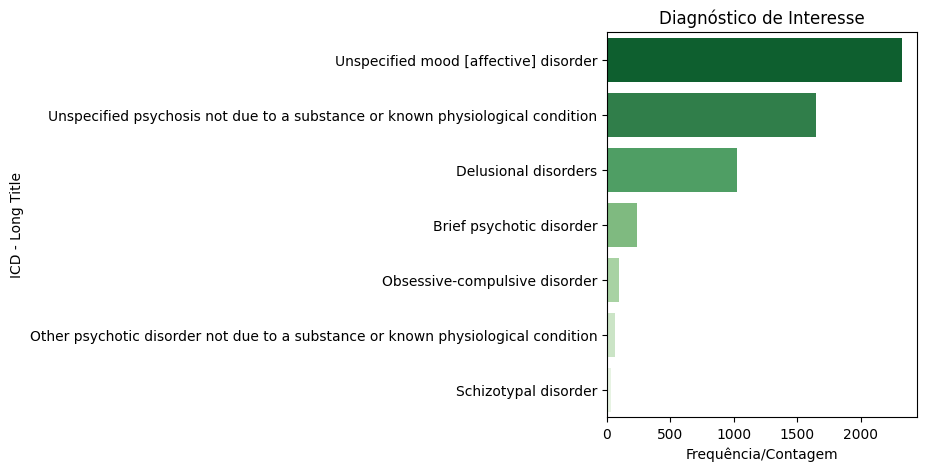

In [33]:
plt.figure(figsize=(4,5))
sns.barplot(x=df_diagnoses_of_interest_count_v10.values, y=df_diagnoses_of_interest_count_v10.index, hue=df_diagnoses_of_interest_count_v10.index, palette='Greens_r', dodge=False, legend=False, orient="h")
plt.title('Diagnóstico de Interesse')
plt.xlabel('Frequência/Contagem')
plt.ylabel('ICD - Long Title')
plt.tight_layout()
plt.show()

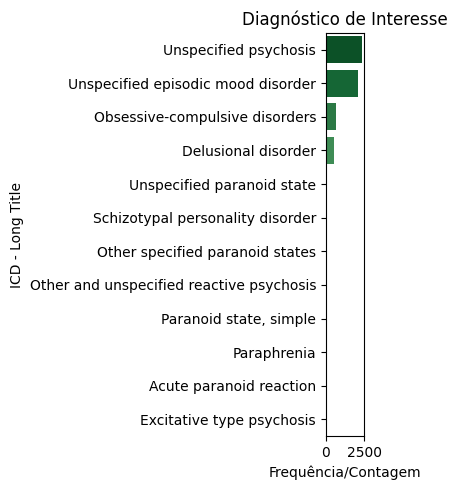

In [34]:
plt.figure(figsize=(4,5))
sns.barplot(x=df_diagnoses_of_interest_count_v9.values, y=df_diagnoses_of_interest_count_v9.index, hue=df_diagnoses_of_interest_count_v9.index, palette='Greens_r', dodge=False, legend=False, orient="h")
plt.title('Diagnóstico de Interesse')
plt.xlabel('Frequência/Contagem')
plt.ylabel('ICD - Long Title')
plt.tight_layout()
plt.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_21432\3396399228.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


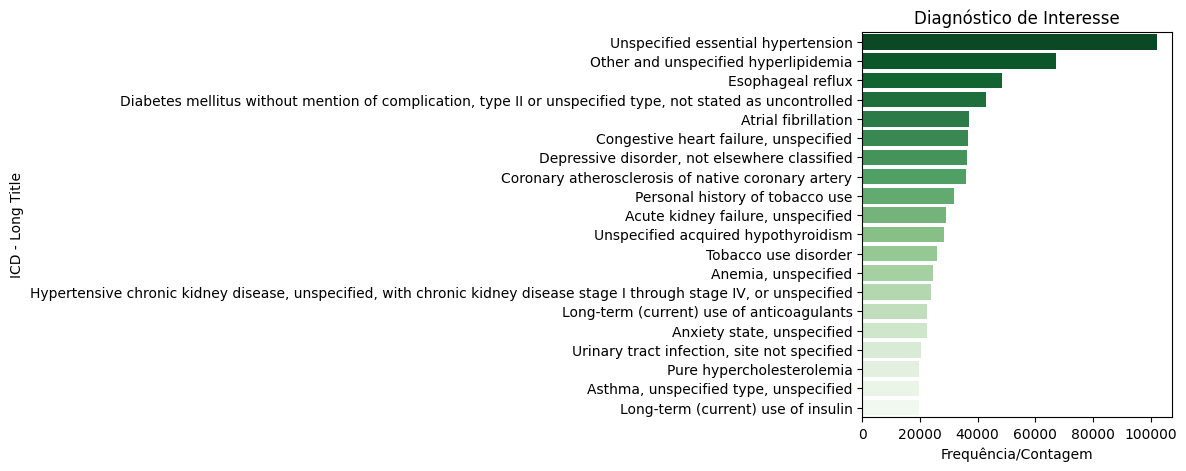

In [ ]:
plt.figure(figsize=(4,5))
sns.barplot(x=df_diagnoses_count_v9[:20].values, y=df_diagnoses_count_v9[:20].index, hue=df_diagnoses_count_v9[:20].index, palette='Greens_r', dodge=False, legend=False, orient="h")
plt.title('Diagnóstico de Interesse')
plt.xlabel('Frequência/Contagem')
plt.ylabel('ICD - Long Title')
plt.tight_layout()
plt.show()